In [1]:
import pandas as pd

In [2]:
matches=pd.read_csv("games.csv", index_col=0)

In [3]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,13/08/2022,21:00,La Liga,Matchweek 1,Sat,Home,D,0,0,Rayo Vallecano,...,Match Report,NaN,21,5,17.0,1,0,0,2023,Barcelona
1,21/08/2022,22:00,La Liga,Matchweek 2,Sun,Away,W,4,1,Real Sociedad,...,Match Report,NaN,15,7,14.6,0,0,0,2023,Barcelona
2,28/08/2022,19:30,La Liga,Matchweek 3,Sun,Home,W,4,0,Valladolid,...,Match Report,NaN,24,9,14.4,1,0,0,2023,Barcelona
3,03/09/2022,21:00,La Liga,Matchweek 4,Sat,Away,W,3,0,Sevilla,...,Match Report,NaN,18,5,16.0,2,0,0,2023,Barcelona
5,10/09/2022,18:30,La Liga,Matchweek 5,Sat,Away,W,4,0,Cádiz,...,Match Report,NaN,16,8,14.9,0,0,0,2023,Barcelona


In [4]:
matches.shape


(1249, 27)

In [5]:
matches["Team"].value_counts()

Barcelona          71
Osasuna            71
Cadiz              71
Atletico Madrid    71
Celta Vigo         71
Real Madrid        71
Villarreal         71
Real Sociedad      71
Sevilla            70
Athletic Club      70
Real Betis         70
Granada            38
Valencia           38
Levante            38
Getafe             38
Alaves             38
Elche              38
Huesca             38
Valladolid         38
Eibar              38
Almeria            33
Mallorca           32
Rayo Vallecano     32
Girona             32
Name: Team, dtype: int64

In [6]:
matches["Round"].value_counts()

Matchweek 1     35
Matchweek 19    35
Matchweek 32    35
Matchweek 31    35
Matchweek 30    35
Matchweek 29    35
Matchweek 28    35
Matchweek 27    35
Matchweek 26    35
Matchweek 25    35
Matchweek 24    35
Matchweek 23    35
Matchweek 22    35
Matchweek 21    35
Matchweek 2     35
Matchweek 17    35
Matchweek 20    35
Matchweek 18    35
Matchweek 9     35
Matchweek 3     35
Matchweek 4     35
Matchweek 5     35
Matchweek 6     35
Matchweek 16    35
Matchweek 8     35
Matchweek 7     35
Matchweek 10    35
Matchweek 11    35
Matchweek 12    35
Matchweek 13    35
Matchweek 14    35
Matchweek 15    35
Matchweek 33    29
Matchweek 34    20
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: Round, dtype: int64

# Looks like we have don't full season




In [7]:
matches.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF                int64
GA                int64
Opponent         object
xG              float64
xGA             float64
Poss              int64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes           float64
Sh                int64
SoT               int64
Dist            float64
FK                int64
PK                int64
PKatt             int64
Season            int64
Team             object
dtype: object

In [8]:
matches["Date"]= pd.to_datetime(matches["Date"])

C:\Users\preet\AppData\Local\Temp\ipykernel_6368\3518475557.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  matches["Date"]= pd.to_datetime(matches["Date"])


In [9]:
matches.dtypes

Date            datetime64[ns]
Time                    object
Comp                    object
Round                   object
Day                     object
Venue                   object
Result                  object
GF                       int64
GA                       int64
Opponent                object
xG                     float64
xGA                    float64
Poss                     int64
Attendance             float64
Captain                 object
Formation               object
Referee                 object
Match Report            object
Notes                  float64
Sh                       int64
SoT                      int64
Dist                   float64
FK                       int64
PK                       int64
PKatt                    int64
Season                   int64
Team                    object
dtype: object

# Predictors for model
Venue- home and away advantage is signiificant in football. so i am going to convert home and away into numbers

Team- give each team a code

Time- do some teams play better at certain times of the day? Night games and mid afternoon games can have different outcomes because of several factors like heat, rain, visibility, crowd energy amanog many others

Day- same as above. Sunday games have more viewers as opposed to midweek. Could such pressure affect performance

In [10]:
matches["Venue_value"]=matches["Venue"].astype("category").cat.codes

In [11]:
matches["Opponent_value"]=matches["Opponent"].astype("category").cat.codes

In [12]:
matches["Hour"]=matches["Time"].str.replace(":.+","", regex=True).astype("int")

In [13]:
matches["Day_Value"]=matches["Date"].dt.dayofweek

In [14]:
matches["Target"]= (matches["Result"]=="W").astype("int")


In [15]:
matches

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,FK,PK,PKatt,Season,Team,Venue_value,Opponent_value,Hour,Day_Value,Target
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0,0,Rayo Vallecano,...,1,0,0,2023,Barcelona,1,18,21,5,0
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4,1,Real Sociedad,...,0,0,0,2023,Barcelona,0,20,22,6,1
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4,0,Valladolid,...,1,0,0,2023,Barcelona,1,23,19,6,1
3,2022-03-09,21:00,La Liga,Matchweek 4,Sat,Away,W,3,0,Sevilla,...,2,0,0,2023,Barcelona,0,21,21,2,1
5,2022-10-09,18:30,La Liga,Matchweek 5,Sat,Away,W,4,0,Cádiz,...,0,0,0,2023,Barcelona,0,7,18,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2021-01-05,14:00,La Liga,Matchweek 34,Sat,Home,W,3,0,Alavés,...,0,0,0,2022,Eibar,1,0,14,1,1
37,2021-09-05,14:00,La Liga,Matchweek 35,Sun,Away,W,1,0,Getafe,...,0,1,1,2022,Eibar,0,11,14,6,1
38,2021-05-13,20:00,La Liga,Matchweek 36,Thu,Home,D,1,1,Betis,...,0,0,0,2022,Eibar,1,5,20,3,0
39,2021-05-16,18:30,La Liga,Matchweek 37,Sun,Away,L,1,4,Valencia,...,0,0,0,2022,Eibar,0,22,18,6,0


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Model choice
Random forest helps pick up non linear trends in data. there i s no clear relantionship between hour and winning. this model will help us determine such trends.

Trained on data from previous seasons.
Tetsed on current season.

In [17]:
rf=RandomForestClassifier(min_samples_split=10,n_estimators=50,random_state=1)

In [18]:
train=matches[matches["Date"]<"2022-9-1"]
train

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,FK,PK,PKatt,Season,Team,Venue_value,Opponent_value,Hour,Day_Value,Target
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0,0,Rayo Vallecano,...,1,0,0,2023,Barcelona,1,18,21,5,0
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4,1,Real Sociedad,...,0,0,0,2023,Barcelona,0,20,22,6,1
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4,0,Valladolid,...,1,0,0,2023,Barcelona,1,23,19,6,1
3,2022-03-09,21:00,La Liga,Matchweek 4,Sat,Away,W,3,0,Sevilla,...,2,0,0,2023,Barcelona,0,21,21,2,1
8,2022-01-10,21:00,La Liga,Matchweek 7,Sat,Away,W,1,0,Mallorca,...,0,0,0,2023,Barcelona,0,16,21,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,2021-01-05,14:00,La Liga,Matchweek 34,Sat,Home,W,3,0,Alavés,...,0,0,0,2022,Eibar,1,0,14,1,1
37,2021-09-05,14:00,La Liga,Matchweek 35,Sun,Away,W,1,0,Getafe,...,0,1,1,2022,Eibar,0,11,14,6,1
38,2021-05-13,20:00,La Liga,Matchweek 36,Thu,Home,D,1,1,Betis,...,0,0,0,2022,Eibar,1,5,20,3,0
39,2021-05-16,18:30,La Liga,Matchweek 37,Sun,Away,L,1,4,Valencia,...,0,0,0,2022,Eibar,0,22,18,6,0


In [19]:
test=matches[matches["Date"]>"2022-9-1"]
test

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,FK,PK,PKatt,Season,Team,Venue_value,Opponent_value,Hour,Day_Value,Target
5,2022-10-09,18:30,La Liga,Matchweek 5,Sat,Away,W,4,0,Cádiz,...,0,0,0,2023,Barcelona,0,7,18,6,1
7,2022-09-17,16:15,La Liga,Matchweek 6,Sat,Home,W,3,0,Elche,...,0,0,0,2023,Barcelona,1,9,16,5,1
10,2022-09-10,21:00,La Liga,Matchweek 8,Sun,Home,W,1,0,Celta Vigo,...,0,0,0,2023,Barcelona,1,6,21,5,1
12,2022-10-16,16:15,La Liga,Matchweek 9,Sun,Away,L,1,3,Real Madrid,...,1,0,0,2023,Barcelona,0,19,16,6,0
13,2022-10-20,21:00,La Liga,Matchweek 10,Thu,Home,W,3,0,Villarreal,...,1,0,0,2023,Barcelona,1,24,21,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,2023-04-15,21:00,La Liga,Matchweek 29,Sat,Home,L,0,2,Real Madrid,...,0,0,0,2023,Cadiz,1,19,21,5,0
30,2023-04-21,21:00,La Liga,Matchweek 30,Fri,Away,D,0,0,Espanyol,...,0,0,0,2023,Cadiz,0,10,21,4,0
31,2023-04-25,19:30,La Liga,Matchweek 31,Tue,Home,L,0,1,Osasuna,...,0,0,0,2023,Cadiz,1,17,19,1,0
32,2023-04-30,14:00,La Liga,Matchweek 32,Sun,Home,W,2,1,Valencia,...,0,0,0,2023,Cadiz,1,22,14,6,1


In [20]:
predictors=["Venue_value","Opponent_value","Day_Value","Hour"]

In [21]:
rf.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [22]:
pred= rf.predict(test[predictors])

In [23]:
from sklearn.metrics import accuracy_score

determine what percentage of times was the model accuracte

In [24]:
accuracy=accuracy_score(test["Target"],pred)
accuracy

0.5856777493606138

In [25]:
combined=pd.DataFrame(dict(actual=test["Target"], predictions=pred))

In [26]:
pd.crosstab(index=combined["actual"], columns=combined["predictions"])

predictions,0,1
actual,,
0,179,41
1,121,50


we predicted a loss/draw correctly 122 times, and a win 51 times

In [27]:
from sklearn.metrics import precision_score

In [28]:
precision_score(test["Target"],pred)

0.5494505494505495

we can improve predictions


In [29]:
matches_pool=matches.groupby("Team")

In [30]:
group=matches_pool.get_group("Barcelona")

# Improving predictors 
Form- current form is important in determining the outcome of next game. so we can leverage this further imporve our model. in this case past 4 games are being used to detemine form

Goals For-
Goals Against-
Pentaly kick attempts-
Distance a shot is taken from-
Free kicks-
Shots on target-
Penalty kicks-
Shots-

 

In [31]:
def averages(group,cols, new_cols):
    group=group.sort_values("Date")
    stats=group[cols].rolling(4, closed="left").mean()
    group[new_cols]=stats
    group=group.dropna(subset=new_cols)
    return group

In [32]:
cols=["GF","GA","PKatt","FK","SoT","PK","Sh"]

In [33]:
new_cols=[f"{i}_avg" for i in cols]

In [34]:
new_cols

['GF_avg', 'GA_avg', 'PKatt_avg', 'FK_avg', 'SoT_avg', 'PK_avg', 'Sh_avg']

In [35]:
averages(group,cols,new_cols)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Hour,Day_Value,Target,GF_avg,GA_avg,PKatt_avg,FK_avg,SoT_avg,PK_avg,Sh_avg
0,2020-09-27,21:00,La Liga,Matchweek 3,Sun,Home,W,4,0,Villarreal,...,21,6,1,2.50,1.25,0.50,1.50,6.00,0.25,14.00
3,2020-10-17,21:00,La Liga,Matchweek 6,Sat,Away,L,0,1,Getafe,...,21,5,0,2.75,1.25,0.75,1.50,7.00,0.50,16.25
5,2020-10-24,16:00,La Liga,Matchweek 7,Sat,Home,L,1,3,Real Madrid,...,16,5,0,2.50,1.25,0.75,1.50,6.00,0.50,15.00
7,2020-10-31,21:00,La Liga,Matchweek 8,Sat,Away,D,1,1,Alavés,...,21,5,0,2.50,1.50,0.75,0.75,5.00,0.50,12.25
10,2020-11-21,21:00,La Liga,Matchweek 10,Sat,Away,L,0,1,Atlético Madrid,...,21,5,0,1.50,1.25,0.25,1.50,5.25,0.25,14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2023-05-03,16:15,La Liga,Matchweek 24,Sun,Home,W,1,0,Valencia,...,16,2,1,2.25,0.50,0.00,0.75,5.50,0.00,13.50
22,2023-08-01,21:00,La Liga,Matchweek 16,Sun,Away,W,1,0,Atlético Madrid,...,21,1,1,2.25,0.50,0.25,1.25,5.50,0.00,13.25
42,2023-10-04,21:00,La Liga,Matchweek 28,Mon,Home,D,0,0,Girona,...,21,2,0,2.25,0.00,0.25,1.25,4.75,0.00,13.25
31,2023-12-02,21:00,La Liga,Matchweek 21,Sun,Away,W,1,0,Villarreal,...,21,5,1,1.25,0.00,0.25,0.75,4.00,0.00,14.00


In [36]:
all_form= matches.groupby("Team").apply(lambda i : averages(i,cols,new_cols))

In [37]:
all_form=all_form.droplevel("Team")

now we have rolling avg fro all teams

In [38]:
all_form.index=range(all_form.shape[0])
all_form

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Hour,Day_Value,Target,GF_avg,GA_avg,PKatt_avg,FK_avg,SoT_avg,PK_avg,Sh_avg
0,2020-09-20,18:30,La Liga,Matchweek 2,Sun,Away,L,1,2,Granada,...,18,6,0,0.50,0.50,0.00,0.00,2.00,0.00,6.50
1,2020-09-26,13:00,La Liga,Matchweek 3,Sat,Home,D,0,0,Getafe,...,13,5,0,0.50,1.00,0.00,0.25,2.00,0.00,5.75
2,2020-09-30,19:00,La Liga,Matchweek 4,Wed,Away,L,1,3,Villarreal,...,19,2,0,0.50,1.00,0.00,0.50,1.75,0.00,6.75
3,2020-10-18,18:30,La Liga,Matchweek 6,Sun,Home,L,0,2,Elche,...,18,6,0,0.50,1.50,0.00,0.50,2.00,0.00,7.25
4,2020-10-25,14:00,La Liga,Matchweek 7,Sun,Away,W,2,0,Valladolid,...,14,6,1,0.50,1.75,0.00,0.50,2.00,0.00,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,2023-04-30,16:15,La Liga,Matchweek 32,Sun,Home,W,3,1,Celta Vigo,...,16,6,1,2.00,1.50,0.25,0.50,7.50,0.00,21.50
1149,2023-07-01,16:15,La Liga,Matchweek 16,Sat,Home,W,2,1,Real Madrid,...,16,5,1,2.25,1.75,0.50,0.50,6.75,0.00,19.25
1150,2023-08-04,21:00,La Liga,Matchweek 28,Sat,Away,W,3,2,Real Madrid,...,21,4,1,2.50,1.50,0.75,0.25,6.00,0.25,17.75
1151,2023-12-02,21:00,La Liga,Matchweek 21,Sun,Home,L,0,1,Barcelona,...,21,5,0,3.00,1.50,0.75,0.50,6.75,0.25,17.75


In [39]:
def make_preds(data,preds,model):
    train=data[data["Date"]<"2023-01-01"]
    
    test=data[data["Date"]>"2023-01-01"]
    
    model.fit(train[preds], train["Target"])
    
    pred= model.predict(test[preds])

    combined=pd.DataFrame(dict(actual=test["Target"], predictions=pred), index= test.index)
    
    precision=precision_score(test["Target"],pred)
    
    return combined,precision

In [40]:
combined,precision=make_preds(all_form,predictors+new_cols,rf)

In [41]:
precision


0.53125

somehow preditions didnt improve, lets dig into it. perhaps lets try other models

In [42]:
combined=combined.merge(all_form[["Team","Opponent","Result","Date"]], left_index=True, right_index=True)

In [43]:
combined

,actual,predictions,Team,Opponent,Result,Date
45,0,0,Almeria,Atlético Madrid,D,2023-01-15
46,0,0,Almeria,Valencia,D,2023-01-23
47,1,1,Almeria,Espanyol,W,2023-01-27
48,0,1,Almeria,Celta Vigo,D,2023-02-04
49,1,1,Almeria,Elche,W,2023-02-05
...,...,...,...,...,...,...
1148,1,1,Villarreal,Celta Vigo,W,2023-04-30
1149,1,1,Villarreal,Real Madrid,W,2023-07-01
1150,1,1,Villarreal,Real Madrid,W,2023-08-04
1151,0,1,Villarreal,Barcelona,L,2023-12-02


In [44]:
home_away= combined.merge(combined, left_on=["Date","Team"], right_on=["Date", "Opponent"])

In [45]:
home_away

,actual_x,predictions_x,Team_x,Opponent_x,Result_x,Date,actual_y,predictions_y,Team_y,Opponent_y,Result_y
0,0,1,Athletic Club,Mallorca,D,2023-01-05,0,0,Mallorca,Athletic Club,D
1,0,0,Athletic Club,Real Sociedad,L,2023-01-14,1,0,Real Sociedad,Athletic Club,W
2,0,0,Athletic Club,Real Madrid,L,2023-01-22,1,1,Real Madrid,Athletic Club,W
3,0,0,Athletic Club,Celta Vigo,L,2023-01-29,1,0,Celta Vigo,Athletic Club,W
4,0,0,Athletic Club,Atlético Madrid,L,2023-02-19,1,1,Atletico Madrid,Athletic Club,W
...,...,...,...,...,...,...,...,...,...,...,...
137,1,1,Villarreal,Celta Vigo,W,2023-04-30,0,0,Celta Vigo,Villarreal,L
138,1,1,Villarreal,Real Madrid,W,2023-07-01,0,0,Real Madrid,Villarreal,L
139,1,1,Villarreal,Real Madrid,W,2023-08-04,0,0,Real Madrid,Villarreal,L
140,0,1,Villarreal,Barcelona,L,2023-12-02,1,1,Barcelona,Villarreal,W


In [46]:
home_away[(home_away["predictions_x"]==1)& (home_away["predictions_y"]==0)]["actual_x"].value_counts()

0    20
1    16
Name: actual_x, dtype: int64

# Variable importance plot 
lets do a variable importance plot to determine what factors the random forest model thought were important

Below our graph shows what features are important in making a prediction:, in this case it is shot_average.
Importantly, the opponent_value is also important. this means our model has realsised some teams are better than others. e.g barcelona or madrid.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
def importance(name,importance,names):
    
    its_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'Names':feature_names,'its_importance':its_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['its_importance'], ascending=False,inplace=True)
    
    plt.figure(figsize=(5,5))
    sns.barplot(x=fi_df['its_importance'], y=fi_df['Names'],color="Black")
    
    plt.title(name + ' IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

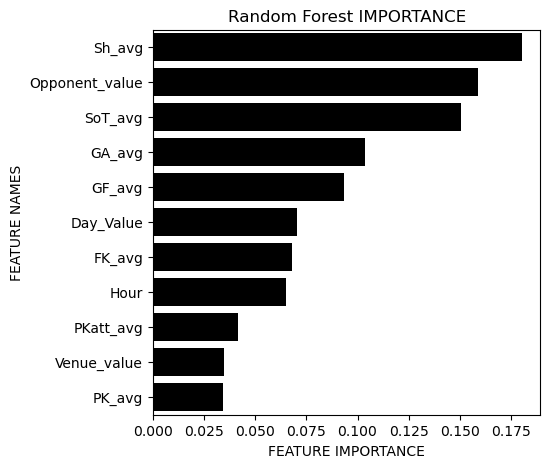

In [49]:
importance("Random Forest",rf.feature_importances_,predictors+new_cols)


# Lets try a Descion Tree Regressor
A decision tree might split the data based on the home team's win/loss record, the away team's win/loss record, etc. Each of these splits creates a subset of the data that is more homogeneous in terms of the outcome (win or loss), allowing the tree to make more accurate predictions based on the remaining features

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
dt=DecisionTreeRegressor(random_state=1)

In [52]:
combined,precision=make_preds(all_form,predictors+new_cols,dt)

In [53]:
combined

,actual,predictions
45,0,0.0
46,0,1.0
47,1,1.0
48,0,0.0
49,1,1.0
...,...,...
1148,1,1.0
1149,1,1.0
1150,1,1.0
1151,0,1.0


In [54]:
precision

0.5517241379310345

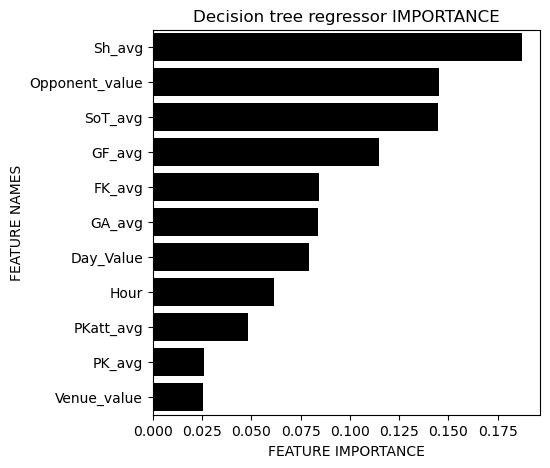

In [55]:
importance("Decision tree regressor",dt.feature_importances_,predictors+new_cols)

neural net

# Logisitic
This is a binary classification algorithm that can be used to predict the probability of a binary outcome, such as win or lose. It works by estimating the probability of the outcome based on a set of input variables.

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr=LogisticRegression()

In [58]:
combined,precision=make_preds(all_form,new_cols,lr)

In [59]:
precision

0.5217391304347826

# Support Vector Machines(SVM) 
Radial Basis Function (RBF) Kernel: This is a good choice for soccer match prediction tasks because soccer match data is typically complex and nonlinear. The RBF kernel can handle this complexity by projecting the data into an infinite-dimensional space and finding a non-linear separating hyperplane.

In [60]:
from sklearn import svm

In [61]:
rbf=svm.SVC(kernel="rbf")

In [62]:
combined,precision=make_preds(all_form,predictors+new_cols,rbf)

In [63]:
precision

0.5454545454545454

# Neural Network 
Neural networks are a class of algorithms that are inspired by the structure and function of the human brain. They can be used for a wide range of tasks, including classification, and have been shown to be effective at predicting winners and losers in various domains. 

For relatively large datasets, Adam is very robust. 
Adam (Adaptive Moment Estimation) is an optimization algorithm commonly used for training neural networks. It is an extension of the stochastic gradient descent (SGD) algorithm that has been shown to be effective in deep learning architectures. 

It usually converges quickly and gives pretty good performance.
ReLU stands for rectified linear unit. It is also known as the ramp function. this activation function is most

ReLU (Rectified Linear Unit) is an activation function commonly used in neural networks. The purpose of an activation function is to introduce nonlinearity into the output of a neuron, which is necessary to learn complex patterns in data. Here's a brief overview of how ReLU works:

ReLU is a simple activation function that returns the input value if it is positive, and 0 otherwise. In mathematical notation, this can be written as: f(x) = max(0, x)

The output of a ReLU neuron is therefore always non-negative, which can help with gradient-based optimization methods.

ReLU has been shown to be effective in deep neural networks because it allows for faster training compared to other activation functions like sigmoid or tanh.

One drawback of ReLU is that it can cause "dead" neurons, where the neuron outputs 0 for all inputs, and thus stops contributing to the network's output. This can be mitigated by using variants of ReLU such as Leaky ReLU, which allow small negative inputs to pass through.

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
mlp = MLPClassifier(hidden_layer_sizes=(3,3,3), activation='relu', solver='adam', max_iter=1200)

In [84]:
combined,precision=make_preds(all_form,new_cols,mlp)

In [85]:
precision

0.5507246376811594